In [1]:
# load txt file and convert to csv
# import panda library
import pandas as pd

# read txt file and create data frame
BayouMetro = pd.read_csv("BayouMetro_Lidar_QA.txt")

print(BayouMetro.head())

BayouMetro.to_csv("BayouMetro_Lidar_QA.csv", index = None)

  Region    ID         Description           X            Y   GPS-Z  Lidar-Z  \
0  North  21.0         Lonoke Park  600612.683  3849204.812  73.620   73.684   
1  North  22.0   Lonoke HS Parking  600123.308  3849067.230  73.852   73.973   
2  North  26.0  England HS Parking  595917.787  3822919.619  68.964   69.088   
3  North  39.0       Carlisle Park  614680.847  3850053.041  70.818   70.955   
4  South   8.0       5800-50063355  613953.929  3805055.048  58.563   58.518   

  LandCover  
0   Asphalt  
1   Asphalt  
2   Asphalt  
3   Asphalt  
4   Asphalt  


In [2]:
# load csv file
BayouMetro_Lidar = pd.read_csv("BayouMEtro_Lidar_QA.csv")
BayouMetro_Lidar.head()

,Region,ID,Description,X,Y,GPS-Z,Lidar-Z,LandCover
0,North,21.0,Lonoke Park,600612.683,3849204.812,73.620,73.684,Asphalt
1,North,22.0,Lonoke HS Parking,600123.308,3849067.230,73.852,73.973,Asphalt
2,North,26.0,England HS Parking,595917.787,3822919.619,68.964,69.088,Asphalt
3,North,39.0,Carlisle Park,614680.847,3850053.041,70.818,70.955,Asphalt
4,South,8.0,5800-50063355,613953.929,3805055.048,58.563,58.518,Asphalt


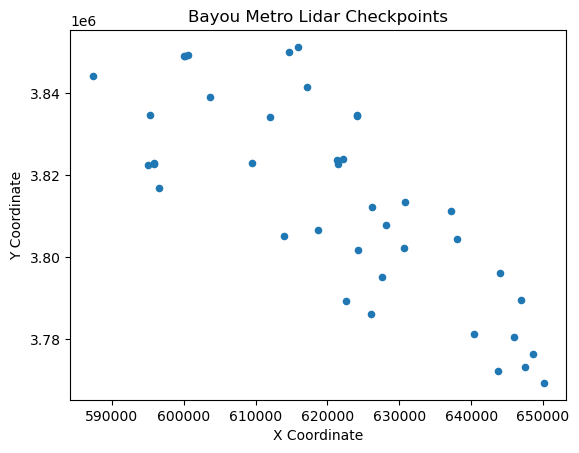

In [3]:
# plot x and y
import matplotlib.pyplot as plt

BayouMetro_Lidar.plot(x = 'X', y = 'Y', kind = 'scatter')

# label axis and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bayou Metro Lidar Checkpoints')

plt.show()

In [4]:
# compute and print mean and std of differences between Lidar-Z and GPS-Z
BayouMetro_Lidar['Diff LidarZ/GPSZ'] = BayouMetro_Lidar['Lidar-Z'] - BayouMetro_Lidar['GPS-Z']
print(BayouMetro_Lidar.head())
# mean
print("Mean of Difference between Lidar and GPS: ", BayouMetro_Lidar['Diff LidarZ/GPSZ'].mean())

# standard deviation
print("Standard Deviation of Difference between Lidar and GPS: ", BayouMetro_Lidar['Diff LidarZ/GPSZ'].std())


  Region    ID         Description           X            Y   GPS-Z  Lidar-Z  \
0  North  21.0         Lonoke Park  600612.683  3849204.812  73.620   73.684   
1  North  22.0   Lonoke HS Parking  600123.308  3849067.230  73.852   73.973   
2  North  26.0  England HS Parking  595917.787  3822919.619  68.964   69.088   
3  North  39.0       Carlisle Park  614680.847  3850053.041  70.818   70.955   
4  South   8.0       5800-50063355  613953.929  3805055.048  58.563   58.518   

  LandCover  Diff LidarZ/GPSZ  
0   Asphalt             0.064  
1   Asphalt             0.121  
2   Asphalt             0.124  
3   Asphalt             0.137  
4   Asphalt            -0.045  
Mean of Difference between Lidar and GPS:  0.07010000000000005
Standard Deviation of Difference between Lidar and GPS:  0.12297629540187605


In [5]:
# Compute and print mean and std of differences between Lidar-Z and GPS-Z measurements by Region
print("Mean by Region")
mean_region = BayouMetro_Lidar.groupby(["Region"])['Diff LidarZ/GPSZ'].mean()
print(mean_region)

print("Standard Deviation by Region")
std_region = BayouMetro_Lidar.groupby(["Region"])['Diff LidarZ/GPSZ'].std()
print(std_region)

Mean by Region
Region
North    0.1397
South    0.0005
}           NaN
Name: Diff LidarZ/GPSZ, dtype: float64
Standard Deviation by Region
Region
North    0.117374
South    0.084068
}             NaN
Name: Diff LidarZ/GPSZ, dtype: float64


In [6]:
# Compute and print the mean and std of the differences between the Lidar-Z ad GPS-Z measurements by LandCover
print("Mean by LandCover")
mean_landcover = BayouMetro_Lidar.groupby(["LandCover"])['Diff LidarZ/GPSZ'].mean()
print(mean_landcover)

print("Standard Deviation by LandCover")
std_landcover = BayouMetro_Lidar.groupby(["LandCover"])['Diff LidarZ/GPSZ'].std()
print(std_landcover)

Mean by LandCover
LandCover
Asphalt    0.048714
Dirt       0.019143
Forest     0.106143
Grass      0.078900
Scrub      0.088556
Name: Diff LidarZ/GPSZ, dtype: float64
Standard Deviation by LandCover
LandCover
Asphalt    0.096864
Dirt       0.058565
Forest     0.190118
Grass      0.127083
Scrub      0.120622
Name: Diff LidarZ/GPSZ, dtype: float64


Mean measures the average. Standard deviation measures the volatility. Although the means are very different when grouped by Region, the standard deviations are not as variable. For Land Cover, the means and the standard deviations are both variable. I believe that the measurement quality is most impacted by the Land Cover.

Text(0.5, 1.0, 'Standard Deviation of Region and Land Cover')

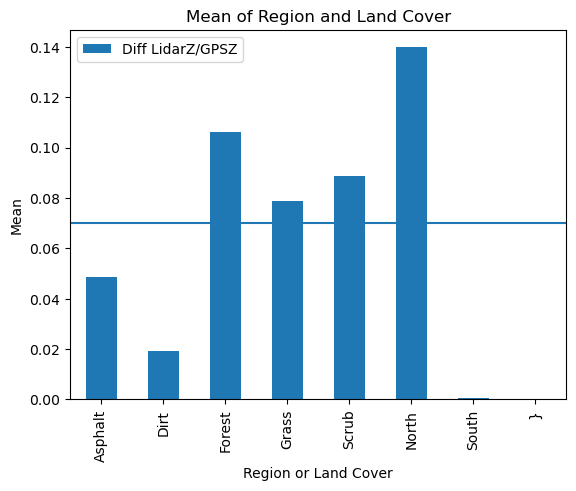

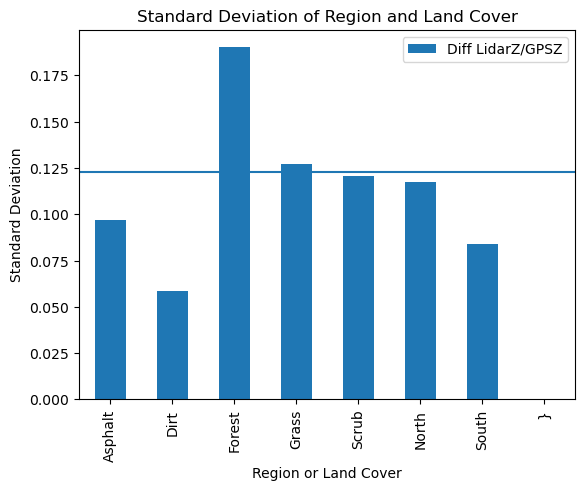

In [7]:
# create plot of assessment
import numpy as np

# change to data frame
mn_land_df = mean_landcover.to_frame()
std_land_df = std_landcover.to_frame()
mn_region_df = mean_region.to_frame()
std_region_df = std_region.to_frame()

# change column names
mn_land_df = mn_land_df.rename(columns = {"LandCover":"Feature"})
std_land_df = std_land_df.rename(columns = {"LandCover":"Feature"})
mn_region_df = mn_region_df.rename(columns = {"Region":"Feature"})
std_region_df = std_region_df.rename(columns = {"Region":"Feature"})

# add region and average
means = [mn_land_df, mn_region_df]
stdv = [std_land_df, std_region_df]
mn_result = pd.concat(means)
std_result = pd.concat(stdv)

mn_result.plot.bar()
plt.axhline(y = BayouMetro_Lidar['Diff LidarZ/GPSZ'].mean())
plt.xlabel('Region or Land Cover')
plt.ylabel('Mean')
plt.title('Mean of Region and Land Cover')

std_result.plot.bar()
plt.axhline(y = BayouMetro_Lidar['Diff LidarZ/GPSZ'].std())
plt.xlabel('Region or Land Cover')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Region and Land Cover')